In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.decomposition import PCA
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
# PCA
fw_people = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)
n_samples, h_pix, w_pix = fw_people.images.shape
X_train, X_test, y_train, y_test = train_test_split(fw_people.data,fw_people.target,test_size=0.3,random_state=8)

n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

In [4]:
#PCA X_train & X_test

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape) #(798,100)

(798, 100)


In [5]:
neighbors = fw_people.target_names.size
model_knn = KNeighborsClassifier(n_neighbors=neighbors)
classifier = model_knn.fit(X_train_pca, y_train)

ypred_test = model_knn.predict(X_test_pca)
class_names = fw_people.target_names

acc = format(accuracy_score(y_test, ypred_test), '0.2%')
print("Accuracy: ",acc)

Accuracy:  74.85%


In [6]:
#read image to predict
img = Image.open("ColinPowell.png")
#img = Image.open("bush.png")

In [7]:
#resize to same dimension
resized_img = img.resize((h_pix, w_pix)).convert("L")

In [8]:
#prepare data for predict
img_data = np.asarray(resized_img)
img_data = np.array(img_data).reshape(1, -1)#(1,1850)
img_pca = pca.transform(img_data)#(1,150)
print(img_pca.shape)


(1, 100)


In [9]:
#predict

output_class = model_knn.predict(img_pca)
#print(output_class)
print("Picture of ",class_names[output_class])

Picture of  ['Colin Powell']


[[ 48   3   4   2   6]
 [  6  19  12   0   3]
 [  5   8 158   1   3]
 [  6   1   7   9   4]
 [  1   1  12   1  22]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        63
           1       0.59      0.47      0.53        40
           2       0.82      0.90      0.86       175
           3       0.69      0.33      0.45        27
           4       0.58      0.59      0.59        37

    accuracy                           0.75       342
   macro avg       0.68      0.61      0.63       342
weighted avg       0.74      0.75      0.74       342



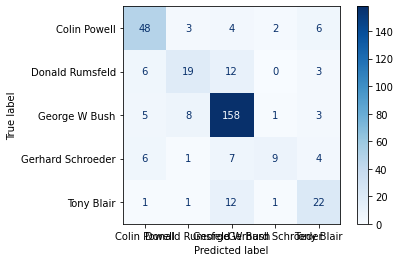

In [10]:
#print confusion matrix and classification report

disp = plot_confusion_matrix(classifier, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
print(classification_report(y_test,ypred_test))